# Data Exploration Notebook

In [ ]:
import gzip
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import seaborn as sns
import sys

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))  
SRC_DIR = os.path.join(BASE_DIR, 'src')
sys.path.append(SRC_DIR)

from constants import RAW_DATA_FILE
from utils import read_and_parse_file

### Print first line in data.csv.gz

In [4]:
with gzip.open(RAW_DATA_FILE, "rt", encoding="utf-8") as file:
    first_line = file.readline().strip()

print(first_line)

2009-19-06 18:24:47 INFO     77525 MSG [msgid:2246981348] [sender:martuviale] [flag:NO_QUERY] [target:1] [content:'@lucasgrabeel13 A SIDECKIK (i don´t know how to write it). i love that phone but cant buy it ´cause it is not for sale in my country ']


### Create DataFrame from data.csv.gz

In [5]:
columns = ["timestamp", "msgid", "sender", "flag", "target", "content"]
df = pd.DataFrame(read_and_parse_file(RAW_DATA_FILE), columns=columns)

df = df.astype(str)

df = df.drop_duplicates(subset=['content'])
display(df.head())

,timestamp,msgid,sender,flag,target,content
0,2009-19-06 18:24:47,2246981348,martuviale,NO_QUERY,1,@lucasgrabeel13 A SIDECKIK (i don´t know how t...
1,2009-30-05 11:31:34,1973630111,flexd,NO_QUERY,1,"@gustomize Ah, pretty far away then Looks rea..."
2,2009-30-05 06:57:04,1971371956,elltotheoh,NO_QUERY,1,i need a desk that doesnt require me to perch ...
3,2009-02-06 22:47:38,2013486201,Chynieee,NO_QUERY,1,I NEED THE SIMS 3
4,2009-30-05 18:50:46,1976712970,millenovecento,NO_QUERY,1,Watching the House marathon and drinking a col...


### Number of unique values per column

In [6]:
unique_values_count = df.nunique()
display(unique_values_count)

timestamp    54723
msgid        56867
sender       50211
flag             1
target           2
content      56867
dtype: int64

### Drop unnecessary columns

In [7]:
df = df.drop(columns=['timestamp', 'msgid', 'sender', 'flag'])
display(df.head())

,target,content
0,1,@lucasgrabeel13 A SIDECKIK (i don´t know how t...
1,1,"@gustomize Ah, pretty far away then Looks rea..."
2,1,i need a desk that doesnt require me to perch ...
3,1,I NEED THE SIMS 3
4,1,Watching the House marathon and drinking a col...


### Target Values Analysis

In [8]:
target_distribution = df['target'].value_counts()
print(target_distribution)

target
1    29925
0    26942
Name: count, dtype: int64


### Content Length Analysis

count    56867.000000
mean        73.691526
std         36.074155
min          0.000000
25%         44.000000
50%         69.000000
75%        103.000000
max        234.000000
Name: content_length, dtype: float64


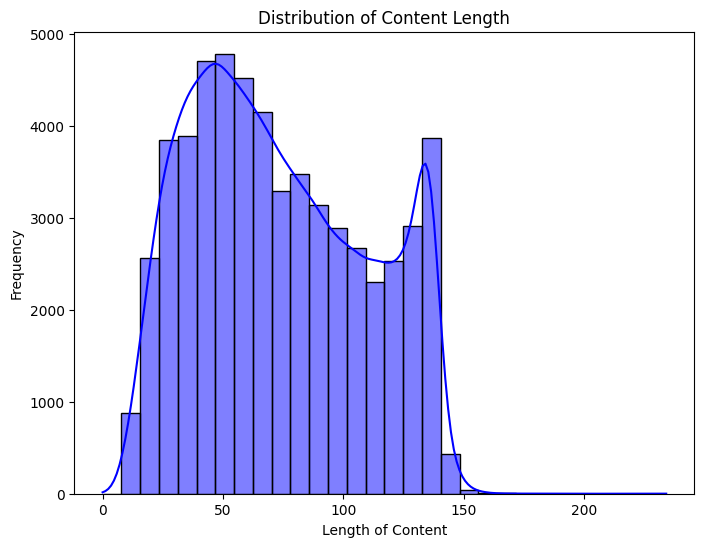

In [9]:
# Add a new column for the length of each message in the 'content' column
df['content_length'] = df['content'].apply(len)

# Show basic statistics of content length
print(df['content_length'].describe())

# Plot the distribution of content length
plt.figure(figsize=(8, 6))
sns.histplot(df['content_length'], kde=True, color='blue', bins=30)
plt.title('Distribution of Content Length')
plt.xlabel('Length of Content')
plt.ylabel('Frequency')
plt.show()

### Word Count Analysis

count    56867.000000
mean        13.199676
std          6.942488
min          0.000000
25%          7.000000
50%         12.000000
75%         19.000000
max         41.000000
Name: word_count, dtype: float64


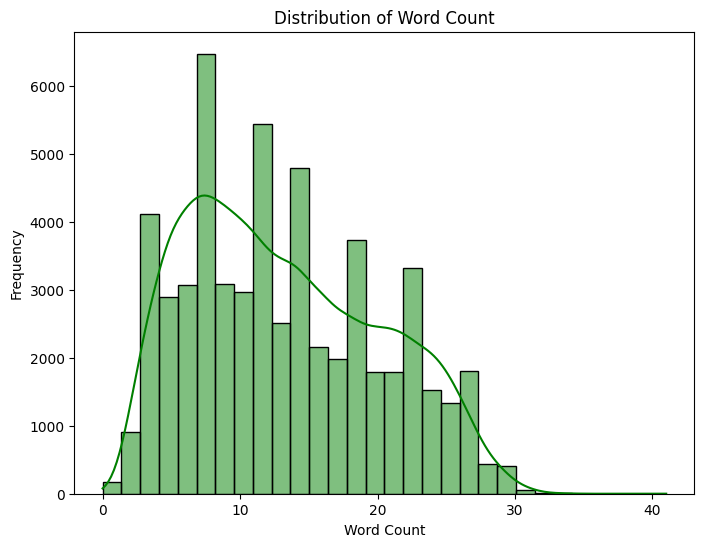

In [10]:
# Add a new column for the number of words in each message
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

# Show basic statistics of word count
print(df['word_count'].describe())

# Plot the distribution of word count
plt.figure(figsize=(8, 6))
sns.histplot(df['word_count'], kde=True, color='green', bins=30)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

### Count Mentions (@username)

In [ ]:
df['mentions_count'] = df['content'].apply(lambda x: len(re.findall(r'@\w+', x)))
df['mentions_count'].value_counts()

mentions_count
0    30799
1    24880
2      927
3      143
4       61
5       26
6       21
9        5
8        3
7        2
Name: count, dtype: int64

### Count Hashtags (#hashtag)

In [13]:
df['hashtags_count'] = df['content'].apply(lambda x: len(re.findall(r'#\w+', x)))
df['hashtags_count'].value_counts()

hashtags_count
0     55576
1      1120
2       117
3        34
4         6
7         3
8         2
9         2
6         2
5         2
10        1
15        1
11        1
Name: count, dtype: int64

### Count Links

In [14]:
df['links_count'] = df['content'].apply(lambda x: len(re.findall(r'http\S+|www\S+|https\S+', str(x))))
print(df['links_count'].value_counts())

links_count
0    54020
1     2791
2       51
3        5
Name: count, dtype: int64
